# Brute Force Approach

Here's a simple brute force algorithm to verify our work

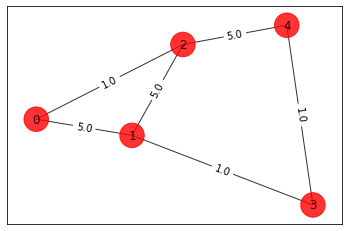

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generating a graph of 4 nodes

n=5 # Number of nodes in graph
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[
    (0,1,5.0),
    (0,2,1.0),
    (1,2,5.0),
    (1,3,1.0),
    (2,4,5.0),
    (3,4,1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)

In [2]:
# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)

[[0. 5. 1. 0. 0.]
 [5. 0. 5. 1. 0.]
 [1. 5. 0. 0. 5.]
 [0. 1. 0. 0. 1.]
 [0. 0. 5. 1. 0.]]


case = [0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0] cost = 6.0
case = [0, 1, 0, 0, 0] cost = 11.0
case = [1, 1, 0, 0, 0] cost = 7.0
case = [0, 0, 1, 0, 0] cost = 11.0
case = [1, 0, 1, 0, 0] cost = 15.0
case = [0, 1, 1, 0, 0] cost = 12.0
case = [1, 1, 1, 0, 0] cost = 6.0
case = [0, 0, 0, 1, 0] cost = 2.0
case = [1, 0, 0, 1, 0] cost = 8.0
case = [0, 1, 0, 1, 0] cost = 11.0
case = [1, 1, 0, 1, 0] cost = 7.0
case = [0, 0, 1, 1, 0] cost = 13.0
case = [1, 0, 1, 1, 0] cost = 17.0
case = [0, 1, 1, 1, 0] cost = 12.0
case = [1, 1, 1, 1, 0] cost = 6.0
case = [0, 0, 0, 0, 1] cost = 6.0
case = [1, 0, 0, 0, 1] cost = 12.0
case = [0, 1, 0, 0, 1] cost = 17.0
case = [1, 1, 0, 0, 1] cost = 13.0
case = [0, 0, 1, 0, 1] cost = 7.0
case = [1, 0, 1, 0, 1] cost = 11.0
case = [0, 1, 1, 0, 1] cost = 8.0
case = [1, 1, 1, 0, 1] cost = 2.0
case = [0, 0, 0, 1, 1] cost = 6.0
case = [1, 0, 0, 1, 1] cost = 12.0
case = [0, 1, 0, 1, 1] cost = 15.0
case = [1, 1, 0, 1, 1] cost = 11.0
case = [0, 0, 1, 1, 1] cost = 7.0

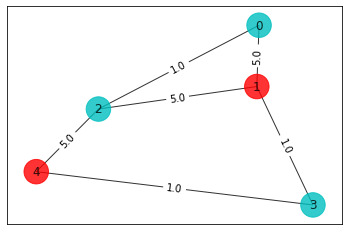

In [4]:
best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))